In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("giaitich1.csv")
df.head()

,Hours,Scores
0,2.0,4.1
1,4.6,6.7
2,2.5,4.7
3,8.0,8.2
4,3.0,5.0


In [3]:
len(df)

24

In [4]:
df_permutated = df.sample(frac = 1)
df_permutated

,Hours,Scores
17,1.4,4.4
16,2.1,3.5
22,3.3,5.5
1,4.6,6.7
10,7.2,8.5
3,8.0,8.2
12,4.0,6.1
8,8.5,7.8
0,2.0,4.1
21,6.2,7.0


In [5]:
train_size = 0.7
train_rows_size = int (len(df_permutated) * train_size)
train_rows_size

16

In [6]:
df_train = df_permutated[:train_rows_size]
df_test = df_permutated[train_rows_size:]

In [7]:
df_train

,Hours,Scores
17,1.4,4.4
16,2.1,3.5
22,3.3,5.5
1,4.6,6.7
10,7.2,8.5
3,8.0,8.2
12,4.0,6.1
8,8.5,7.8
0,2.0,4.1
21,6.2,7.0


In [8]:
df_test

,Hours,Scores
19,12.4,9.5
6,8.7,9.3
23,6.5,7.6
7,5.0,7.0
20,3.1,4.5
18,5.6,7.7
9,2.7,4.5
5,1.0,3.2


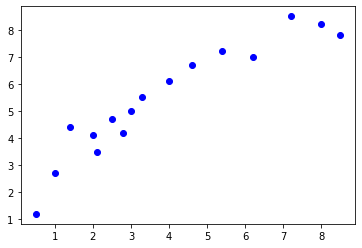

In [9]:
plt.plot(df_train.Hours, df_train.Scores, "bo")
plt.show()

In [10]:
def ln_reg_model(x, y, lr, iter):
    x = np.vstack((x.values, np.ones(x.values.size))).T
    y = y.values.reshape((x.shape[0],1))
    
    m = x.shape[0]

    theta = np.ones((x.shape[1], 1))
    cost_his = []

    for i in range (iter):
        y_pred = np.dot(x, theta)
        cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))

        cost_his.append(cost)
        d_theta = (1/m) * np.dot(x.T, y_pred - y)
        theta -= d_theta * lr
    return theta, cost_his

In [11]:
theta, cost_his = ln_reg_model(df_train.Hours, df_train.Scores, 0.00005, 150)

In [12]:
x_line = np.array([1,20])
x_line_mat = np.vstack((x_line, np.ones(x_line.size))).T
y_line = np.dot(x_line_mat, theta)

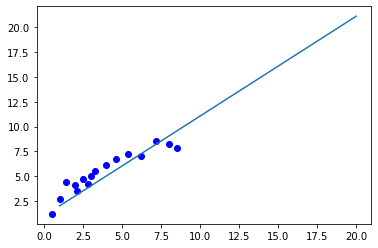

In [13]:
plt.plot(df_train.Hours, df_train.Scores, "bo")
plt.plot(x_line, y_line)
plt.show()

In [14]:
def predict(x, theta):
    x = np.vstack((x.values, np.ones(x.values.size))).T
    return np.dot(x, theta)
    

In [15]:
y_test = predict(df_test.Hours, theta)

In [16]:
print(y_test)

[[13.46402022]
 [ 9.74605234]
 [ 7.53536873]
 [ 6.02808446]
 [ 4.11885771]
 [ 6.63099817]
 [ 3.71691523]
 [ 2.00865972]]


In [17]:
print(df_test.Scores)

19    9.5
6     9.3
23    7.6
7     7.0
20    4.5
18    7.7
9     4.5
5     3.2
Name: Scores, dtype: float64


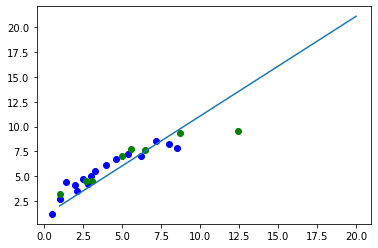

In [18]:
plt.plot(df_train.Hours, df_train.Scores, "bo")
plt.plot(df_test.Hours, df_test.Scores, "go")
plt.plot(x_line, y_line)
plt.show()